# Natural Language Processing

## A UTSA Libraries - CEDISH workshop

To begin, if you are working with Anaconda Navigator, launch your Navigator. Select the "Environments" pane and create a new Python environment. You can call it `nlp_workshop` or another name that makes sense to you.

If you do not have a Python environment on your computer, go to Google Colab at https://colab.research.google.com. Then create a new notebook.

In your Navigator environments pane, with the new environment selected, switch the dropdown from "Installed" to "Not installed" and search for "spacy: Industrial-strength natural language processing (nlp) in python". Select it. In addition, we are going to install the English language pipeline. Search for "spacy-model-en" and select the 'en_core_web_sm' pipleine. Click "Apply" to install the packages, and click "apply" again when prompted again.

In Google Colab, it should not be necessary to install packages. Colab will resolve libraries and their dependencies for you.

In Navigator, select the "Home" tab, and with your new environment selected, find Jupyter Notebook (not Jupyter Lab) and click Install. Once installed, the prompt in the Jupyter Notebook box will change from "Install" to "Launch". Click to launch. Once the Notebook browser has launched, navigate to your project folder. Create a new folder for this workshop and navigate into it. Launch a new notebook (it should just say Python 3 (ipykernel) or something similar). Rename the new notebook.

Now our Navigator and Colab work streams join back together. We are going to use the spaCy library for natural language processing. First we must import this library.

In [2]:
import spacy

The spaCy NLP library is now ready for us to use. Next, we need to load the specific pipeline we are using, in this case the English language pipeline. SpaCy has libraries for numerous European and East Asian languages.

In [3]:
nlp = spacy.load('en_core_web_sm')

Here, we have loaded the core English spaCy pipeline. This loads the vocabulary dictionary, and creates a Python object, which by convention we call `nlp`. The `nlp` object has all sorts of capabilities and properties for our use.

Our next step is to load some sort of text for us to work with. SpaCy is trained on web content, but we are going to see how it works on literary content. If you wish, go to the Project Gutenberg site and select a text. Copy and paste the text into a text editor such as TextEdit on MacOS or Notepad on Windows, or Sublime on any platform. Or, go to the workshop repo at https://github.com/jruedas1/cedish-nlp-workshop to download the Gutenberg project text file of Charlotte Brontë's Jane Eyre.

## Opening a text file and basic Python text processing

We will first do some simple pre-processing in base Python. This is not yet nlp, just basic Python text processing. Python is a very powerful text processing language, even without using any NLP libraries.

To open a file and read it, we will use a context manager. Assuming the file is in the same folder as your notebook is being saved, use the following process to read the file as a list of lines. We can then verify how many lines we have.

In [4]:
with open('jane-eyre.txt') as je:
    lines = je.readlines()

print(len(lines))

21381


We can look at a selection of lines by using a slice. The result of a `.readlines()` operation is a list, and a part of a list can be selected with list slicing.

In [5]:
print(lines[9995:10015])

['flowers in this old garden awake and expand, and the birds fetch their\n', 'young ones’ breakfast out of the Thornfield, and the early bees do\n', 'their first spell of work—I’ll put a case to you, which you must\n', 'endeavour to suppose your own: but first, look at me, and tell me you\n', 'are at ease, and not fearing that I err in detaining you, or that you\n', 'err in staying.”\n', '\n', '“No, sir; I am content.”\n', '\n', '“Well then, Jane, call to aid your fancy:—suppose you were no longer a\n', 'girl well reared and disciplined, but a wild boy indulged from\n', 'childhood upwards; imagine yourself in a remote foreign land; conceive\n', 'that you there commit a capital error, no matter of what nature or from\n', 'what motives, but one whose consequences must follow you through life\n', 'and taint all your existence. Mind, I don’t say a _crime_; I am not\n', 'speaking of shedding of blood or any other guilty act, which might make\n', 'the perpetrator amenable to the law: my word

For a prettier output, more similar to how the text is displayed in a text editor, we can **loop** over the list slice and print out each line, specifying that it should end with an empty string, rather than with a newline character.

In [6]:
for line in lines[9995:10015]:
    print(line, end="")

flowers in this old garden awake and expand, and the birds fetch their
young ones’ breakfast out of the Thornfield, and the early bees do
their first spell of work—I’ll put a case to you, which you must
endeavour to suppose your own: but first, look at me, and tell me you
are at ease, and not fearing that I err in detaining you, or that you
err in staying.”

“No, sir; I am content.”

“Well then, Jane, call to aid your fancy:—suppose you were no longer a
girl well reared and disciplined, but a wild boy indulged from
childhood upwards; imagine yourself in a remote foreign land; conceive
that you there commit a capital error, no matter of what nature or from
what motives, but one whose consequences must follow you through life
and taint all your existence. Mind, I don’t say a _crime_; I am not
speaking of shedding of blood or any other guilty act, which might make
the perpetrator amenable to the law: my word is _error_. The results of
what you have done become in time to you utterly insup

A list of lines is not the same thing as a text. Each line is text, but the list of lines is a Python list object, not a text. To analyze this text using NLP, we are going to need to create a text. We can gather the lines together into one text by using a loop again. 

Here, we create an empty string called `full_text`. We will use this as an **accumulator variable**. Then we loop over each line and add it to the accumulator variable. When we are done, we have the full text of Jane Eyre. When we look at the length of this, we get the number of characters in the text. It is a little over one million characters.

In [7]:
full_text = ''
for line in lines:
    full_text += line

print(len(full_text))

1041691


If we print a slice of the full text, we are telling Python what characters we want to display. Think of a string as a bit like a list of characters.

In [8]:
print(full_text[10000:11000])

themselves with the succeeding vignettes,
and gave significance to the rock standing up alone in a sea of billow
and spray; to the broken boat stranded on a desolate coast; to the cold
and ghastly moon glancing through bars of cloud at a wreck just
sinking.

I cannot tell what sentiment haunted the quite solitary churchyard,
with its inscribed headstone; its gate, its two trees, its low horizon,
girdled by a broken wall, and its newly-risen crescent, attesting the
hour of eventide.

The two ships becalmed on a torpid sea, I believed to be marine
phantoms.

The fiend pinning down the thief’s pack behind him, I passed over
quickly: it was an object of terror.

So was the black horned thing seated aloof on a rock, surveying a
distant crowd surrounding a gallows.

Each picture told a story; mysterious often to my undeveloped
understanding and imperfect feelings, yet ever profoundly interesting:
as interesting as the tales Bessie sometimes narrated on winter
evenings, when she chanced to be

The full text of a novel may still be more than we want to deal with. We can use Python to split the text into parts. In this case, I know that each chapter has a heading that consists of the word "CHAPTER" in all caps, followed by a Roman numeral. I also know that the word "CHAPTER" in all caps appears only where a chapter begins. I can use that informtion to split the text. 

This is the sort of small snippet of code that generative AI LLMs are good at producing. This code was produced by ChatGPT on my instructions. It is helpful to know Python well before ordering gen AI to generate it, since that is the only way you can tell if there are mistakes, if the chatbot has given you what you actually asked for, and how to modify it to suit your needs.

Here, we import a library called `re`, which is the *regular expression* library. Regular expressions are text-matching patterns. Then, we define a function called `extract_chapter`. A function is a piece of reusable code that we can call over and over again as needed. After the function definition, between parentheses, are the function **parameters**. These are the bits of information the function needs in order to do its job. In this case, the function needs a reference to the full text we are workiing from, and the chapter number we are looking for. The chapter numbers are the strings representing Roman numerals. Note that this function is specific to our text of Jane Eyre.

The function defines a pattern: a newline character followed by the word "CHAPTER", followed by whatever chapter number we are looking for, followed by another newline character. The function then splits the text into two parts at the chapter heading specified: everything before the chapter we are looking for, and everything from the beginning of the chapter to the end of the book (`re.split(pattern, full_text)`. It then takes the text of the chapter we are looking for, and splits it again at the next occurence of the word "CHAPTER", and returns the result. 

Thanks to this, we have a reusable function we can use to extract individual chapters from the full text of Jane Eyre.

In [9]:
import re

def extract_chapter(full_text, chapter_number):
    # Define regex pattern to find chapter headings
    pattern = rf"\n+CHAPTER {chapter_number}\n+"
    
    # Split text at chapter headings
    chapters = re.split(pattern, full_text, flags=re.IGNORECASE)

    if len(chapters) > 1:
        return chapters[1].strip().split("\nCHAPTER")[0]  # Extract up to the next chapter
    else:
        return "Chapter not found."

# Example usage:
chapter_text = extract_chapter(full_text, "XXIV")
print(len(chapter_text))

38376


In [10]:
print(chapter_text[500:600])

 look at my master, because I feared he could not be pleased at my
look; but I was sure I might lift


We have seen how to read text files into Python memory. We can also use Python to write text to files on our system. If the file does not exist, it is created on the spot. We use the same context manager syntax we did to read the file, but this time we add the 'w' option to indicate that we want to write. We then use the write method to write our chapter text to a file.

In [11]:
with open('je_chapter_24.txt', 'w') as f:
    f.write(chapter_text)

We now have a text file of Jane Eyre, chapter 24. We have saved it to our file system and can reuse it any time we want. We can repeat the process for other chapters.

In [12]:
chapter12 = extract_chapter(full_text, "XII")

with open('je_chapter_12.txt', 'w') as f:
    f.write(chapter12)

Since we are doing something over and over again, we should write a function with reusable code that can extract our Jane Eyre chapters. Be careful, here the pattern has been changed to use a parameter called `chapter_roman_numeral` for specificity, while `chapter_number` is used for naming the file.

In [13]:
def extract_and_write_chapter(full_text, chapter_roman_numeral, chapter_number):
    pattern = rf"\n+CHAPTER {chapter_roman_numeral}\n+"
    
    # Split text at chapter headings
    chapters = re.split(pattern, full_text, flags=re.IGNORECASE)
    
    if len(chapters) > 1:
        chapter = chapters[1].strip().split("\nCHAPTER")[0]  # Extract up to the next chapter
    else:
        chapter = ""
    
    if(chapter):
        file_name = f'je_chapter_{str(chapter_number)}.txt'
        with open(file_name, 'w') as f:
            f.write(chapter)
    else:
        print(f"Nothing to write for chapter {chapter_roman_numeral}")

In [14]:
extract_and_write_chapter(full_text, "XXI", 31)

## Tokenization

We can see that Python has very powerful text processing capabilities inherently, and can be used to take text and split it or modify it in very complex ways. These capabilities are even further enhanced when we use natural language processing.

Remember that earlier in this notebook, we imported spacy (`import spacy`) and loaded the English pipeline (`nlp = spacy.load('en_core_web_sm'`), so we have a pipeline object, which by convention we called `nlp`. The nlp object has properties and methods, that is, things that it *is* or *has* and things that it *does*. Properties of an object are examined using dot notation with no parentheses. Here we can examine the `nlp` object's `pipeline` property. This tells us the pipeline components. We have a tokenizer and vectorizer, a tagger, a dependency parser, a lemmatizer, a named entity recognition component, and the attribute ruler, which is more of an architectural component that we don't use directly for the most part.

In [15]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x311222090>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x311221f70>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x31126e180>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x311556b50>),
 ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x31153f290>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x31126e1f0>)]

The first step in NLP with spaCy is always tokenization. We use the nlp method on any text. Here we are using it on the `chapter12` variable we created earlier, representing the text of chapter 12 of Jane Eyre. We could also load it from the file we created. Here is how we would load the file into text:

In [16]:
with open('je_chapter_12.txt') as f:
    chapter12 = f.read()

Keep in mind that the `.read()` method may fail for very large text files. It would not be a good way to read the entire text of Jane Eyre into memory. That is why we used `.readlines()` and then reassembled the text. The `.read()` method will work on individual chapters.

In [17]:
doc = nlp(chapter12)

By convention, when we run the `nlp` method on a text, the resulting object is called `doc` or some variant of `doc`. This is a spaCy `doc` object. A `doc` object is a list of token objects. We can find out how many tokens we have by looking at the length of the `doc` list.

In [18]:
print(len(doc))

5435


We can use list slicing to create a selection of tokens. A selection of a `doc` object is called a **Span** in spaCy. Note that a spaCy span is not just a list of tokens, it is also an object with its own properties and methods.

In [19]:
selection = doc[0:20]
print(selection)

The promise of a smooth career, which my first calm introduction to
Thornfield Hall seemed to pledge,


Tokens are objects that contain lots of useful information about the text they refer to. Each token is represents one meaningful unit of language. In English, this is rougly equivalent to a word, but in some cases words may be multiple tokens. In addition, punctuation is also tokenized as it carries some meaning.

We can loop over the tokens in our selection and look at some of the properties of a spaCy token. Here we look at the token text, the part of speech, and the syntactic dependency relation.

[NLP part of speech labels](https://www.pythonprog.com/spacy-part-of-speech-tags/)

[NLP dependency labels](https://github.com/clir/clearnlp-guidelines/blob/master/md/specifications/dependency_labels.md)

In [20]:
for token in selection:
    print(token.text, token.pos_, token.dep_)

The DET det
promise NOUN nsubjpass
of ADP prep
a DET det
smooth ADJ amod
career NOUN pobj
, PUNCT punct
which PRON dobj
my PRON poss
first ADJ amod
calm ADJ amod
introduction NOUN nsubj
to ADP prep

 SPACE dep
Thornfield PROPN compound
Hall PROPN pobj
seemed VERB relcl
to PART aux
pledge VERB xcomp
, PUNCT punct


We can get a better readout on the meaning of these labels by using the `spacy.explain` method. Let's also use something called an *f-string* to space it out into a more readable format.

In [21]:
for token in selection:
    print(f'{token.text:15}{token.pos_:10}{spacy.explain(token.pos_)}')

The            DET       determiner
promise        NOUN      noun
of             ADP       adposition
a              DET       determiner
smooth         ADJ       adjective
career         NOUN      noun
,              PUNCT     punctuation
which          PRON      pronoun
my             PRON      pronoun
first          ADJ       adjective
calm           ADJ       adjective
introduction   NOUN      noun
to             ADP       adposition

              SPACE     space
Thornfield     PROPN     proper noun
Hall           PROPN     proper noun
seemed         VERB      verb
to             PART      particle
pledge         VERB      verb
,              PUNCT     punctuation


Spacy does have a concept of sentences, which are selections of tokens, in other words, a kind of spaCy Span object.

In [22]:
spans = list(doc.sents)
first_sentence = spans[0]
for token in first_sentence:
    print(f'{token.text:15}{token.pos_:10}{spacy.explain(token.pos_)}')

The            DET       determiner
promise        NOUN      noun
of             ADP       adposition
a              DET       determiner
smooth         ADJ       adjective
career         NOUN      noun
,              PUNCT     punctuation
which          PRON      pronoun
my             PRON      pronoun
first          ADJ       adjective
calm           ADJ       adjective
introduction   NOUN      noun
to             ADP       adposition

              SPACE     space
Thornfield     PROPN     proper noun
Hall           PROPN     proper noun
seemed         VERB      verb
to             PART      particle
pledge         VERB      verb
,              PUNCT     punctuation
was            AUX       auxiliary
not            PART      particle
belied         VERB      verb
on             ADP       adposition
a              DET       determiner
longer         ADJ       adjective

              SPACE     space
acquaintance   NOUN      noun
with           ADP       adposition
the            DET 

The spaCy dependency parser analyzes words in terms of their grammatical relationships with one another.

In [23]:
for token in first_sentence:
    print(f'{token.text:15}{token.dep_:10}{spacy.explain(token.dep_)}')

The            det       determiner
promise        nsubjpass nominal subject (passive)
of             prep      prepositional modifier
a              det       determiner
smooth         amod      adjectival modifier
career         pobj      object of preposition
,              punct     punctuation
which          dobj      direct object
my             poss      possession modifier
first          amod      adjectival modifier
calm           amod      adjectival modifier
introduction   nsubj     nominal subject
to             prep      prepositional modifier

              dep       unclassified dependent
Thornfield     compound  compound
Hall           pobj      object of preposition
seemed         relcl     relative clause modifier
to             aux       auxiliary
pledge         xcomp     open clausal complement
,              punct     punctuation
was            auxpass   auxiliary (passive)
not            neg       negation modifier
belied         ROOT      root
on             prep

## Visualizing parts of speech with Displacy

Although we can look at each word as having a syntactic dependency relationship, this makes more sense if we look at an entire unit, such as a sentence. SpaCy has a visualizer called displacy that we can use for this.

In [24]:
from spacy import displacy

displacy.render(first_sentence, style='dep', jupyter=True, options={'compact':'True'})

This shows the parts of speech along the bottom and their dependency relations, schematically, across the top.

## Named Entity Recognition

Let's look briefly at another element of the NLP pipeline, named entity recognition. Here's a basic utility function that will show the entities in any given text.

In [25]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

This function accepts a `doc` object. Notice it then asks whether the `doc` object has an `ents` property that is not empty. If the `ents` property is not empty, it loops over the entities and displays some information about them.

In [26]:
show_ents(nlp(chapter12))

first - ORDINAL - "first", "second", etc.
Thornfield Hall - ORG - Companies, agencies, institutions, etc.
Fairfax - PERSON - People, including fictional
quarter - CARDINAL - Numerals that do not fall under another type
one inch - QUANTITY - Measurements, as of weight or distance
Adèle’s - ORG - Companies, agencies, institutions, etc.
Fairfax - GPE - Countries, cities, states
Fairfax - PERSON - People, including fictional
three - CARDINAL - Numerals that do not fall under another type
Fairfax - PERSON - People, including fictional
Adèle - GPE - Countries, cities, states
third - ORDINAL - "first", "second", etc.
Millions - CARDINAL - Numerals that do not fall under another type
millions - CARDINAL - Numerals that do not fall under another type
Grace Poole’s - PERSON - People, including fictional
first - ORDINAL - "first", "second", etc.
John - PERSON - People, including fictional
Sophie - ORG - Companies, agencies, institutions, etc.
French - NORP - Nationalities or religious or politica

NER is excellent but often imperfect. To do a good analysis of a text may often require customizing the entities. For example, here the spaCy NER pipeliine believes that Adèle is an organization. We could overrule this.

In [27]:
from spacy.pipeline import EntityRuler

nlp = spacy.load("en_core_web_sm")
ruler = nlp.add_pipe("entity_ruler", before="ner")

patterns = [{"label": "PERSON", "pattern": "Adèle"}]
ruler.add_patterns(patterns)

doc = nlp(chapter12)

for ent in doc.ents[:10]:
    print(ent.text, ent.label_)

first ORDINAL
Thornfield Hall ORG
Fairfax PERSON
quarter CARDINAL
one inch QUANTITY
Adèle PERSON
Fairfax GPE
Adèle PERSON
Fairfax PERSON
three CARDINAL


Adèle is now a person. We can likewise remove entities or add completely new entities and even entity categories.

Like parts of speech and dependency relations, entities have a visualizer.

In [28]:
for sentence in list(doc.sents)[:30]:
    if sentence.ents:
        displacy.render(sentence, style='ent', jupyter=True)

## Pattern Matching

You can always use regular expressions with Python text processing to match patterns. However spaCy comes with its own pattern matcher that can be quicker and simpler to use sometimes, though regular expressions are still more flexible.

Let's say we want to study how Charlotte Brontë wrote about eyes in Jane Eyre. First we are going to import the spacy Matcher library. Then we are going to create an instance of the matcher by passing it the specific vocabulary we are using. Remember, we loaded the English library. Our `nlp` object carries a vocabulary property derived from this library. Here, we call the Matcher method, hand it our vocabulary library, and generate a specific matcher instance called `matcher`. 

In [29]:
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)

Now, we create a pattern. SpaCy patterns are lists of dictionaries. A dictionary in Python is a data structure with keys and values: `{'key':'value', 'key2':'value2'}`. Matcher patterns consist of a token attribute and a pattern. The full list of token attributes is in the spaCy documentation ([spacy Matcher docs](https://spacy.io/api/matcher/)). In this case, we are saying, find any instance in the text that, if lower-cased, matches the pattern 'eye'. This would match 'Eye' or 'eyes', for example.

In [30]:
pattern = [{'LOWER': 'eye'}]
matcher.add('eyes', [pattern])

Now we can pass our document to our matcher and save the results in a variable called `found_matches`. The result will be a list of tuples. In Python, a tuple is like a list, but it is immutable -- you can't add or remove items from a tuple, which makes it more efficient in terms of memory usage, though less flexible. Each match contains an id, a start index, and an end index.

In [31]:
found_matches = matcher(doc)
print(found_matches)

[(17253078544852491660, 672, 673), (17253078544852491660, 3632, 3633), (17253078544852491660, 4502, 4503)]


If we want to see the context around the matches, we can use tuple destructuring. Since a tuple is immutable, and we know in this case it always has the same matches, we can use this Python syntax to extract its contents as individual variables: `match_id, start, end = match`. Here, we are looping over our matches and printing forty characters surrounding the match. This is often called a [**concordance**](https://en.wikipedia.org/wiki/Concordance_(publishing)).

In [32]:
for match in found_matches:
    match_id, start, end = match
    print(doc[start-20:end+20])

backwards and forwards, safe in the silence and
solitude of the spot, and allow my mind’s eye to dwell on whatever
bright visions rose before it—and, certainly, they were many and

not a servant at the hall, of course. You are—” He stopped,
ran his eye over my dress, which, as usual, was quite simple: a black
merino cloak, a
Thornfield, a mile distant; and when I glanced down in
the direction of the murmur, my eye, traversing the hall-front, caught
a light kindling in a window: it reminded me that


We can also print out the full sentence for each match.

In [33]:
for match in found_matches:
    match_id, start, end = match
    print(doc[start:end].sent.text)
    print('-----------------------')

Then my sole relief was to walk along the corridor of
the third storey, backwards and forwards, safe in the silence and
solitude of the spot, and allow my mind’s eye to dwell on whatever
bright visions rose before it—and, certainly, they were many and
glowing; to let my heart be heaved by the exultant movement, which,
while it swelled it in trouble, expanded it with life; and, best of
all, to open my inward ear to a tale that was never ended—a tale my
imagination created, and narrated continuously; quickened with all of
incident, life, fire, feeling, that I desired and had not in my actual
existence.


-----------------------
You are—” He stopped,
ran his eye over my dress, which, as usual, was quite simple: a black
merino cloak, a black beaver bonnet; neither of them half fine enough
for a lady’s-maid.
-----------------------
When I came to the stile, I stopped a minute, looked
round and listened, with an idea that a horse’s hoofs might ring on the
causeway again, and that a rider in 

## Lemmatisation

In natural language, we understand that some words have many forms. The study of how words take on different forms is called [Morphology](https://en.wikipedia.org/wiki/Morphology_(linguistics)). In NLP, we sometimes want to treat different forms of a word as being in the same category. In the early days of computational linguistics, this was accomplished by [stemming algorithms](https://en.wikipedia.org/wiki/Stemming). These reduced words to word stems. However, with the development of more complex language libraries, stemming algorithms have given way to lemmatization algorithms. In contrast to a word's stem, a *lemma* is understood to be its dictionary form. Modern NLP libaries are able to determine the lemma of large numbers of words.

SpaCy tokens have lemma properties. It is useful to see that lemmas have numerical codes. Some of the most common have simple numeric codes, but most are long numbers that are derived from hashing algorithms. These can be useful in distinguishing homophonous words, for example "see" as in "to see something", and "see" as in "the Holy See" are different words with different lemmas. In spaCy it is common for a token property alone to be a numeric code, and we can get the explicit term for it by adding an underscore.

In [34]:
selection = doc[1000:2000]
for token in selection:
    if(token.pos_ == 'VERB'):
        print(f'{token.text:20}{token.lemma_:20}{token.lemma}')

heard               hear                16158783587822825203
thrilled            thrill              16877802511855043285
heard               hear                16158783587822825203
were                be                  10382539506755952630
account             account             16051117652154763083
made                make                9614445426764226664
saw                 see                 11925638236994514241
come                come                5307304325359566725
go                  go                  8004577259940138793
return              return              9563260825101828504
forgive             forgive             10122195446053341928
telling             tell                63172552626595070
bearing             bear                3737373500888618661
acted               act                 4330217062942772869
raised              raise               5672587182617165530
featured            feature             16417888112635110788
had                 have          

We can match patterns based on lemmas. For example, if we want to take our analysis of Jane Eyre beyond merely eyes, and into seeing in general, we can search for the lemma for "see" and print out a concordance for matches on all forms of the verb "to see".

In [35]:
pattern = [{"lemma": "see"}]
matcher.add("SEE", [pattern])
matches = matcher(doc)

for match in matches:
    match_id, start, end = match
    print(doc[start-10:end+10])
    print('------------------')

regions full of life I had heard of but never seen—that then I
desired more of practical experience
------------------
solitude of the spot, and allow my mind’s eye to dwell on whatever
bright visions rose before it
------------------
not account for the sounds she made. Sometimes I saw her: she would
come out of her room
------------------
would be a
pleasant winter afternoon walk. Having seen Adèle comfortably seated in
her little chair by Mrs.
------------------
causeway. The dog
came bounding back, and seeing his master in a predicament, and hearing
the
------------------
I would not be driven
quite away till I saw the event. This was finally fortunate; the horse
------------------
and the moon was waxing bright: I
could see him plainly. His figure was enveloped in a riding
------------------
offering my services unasked. I
had hardly ever seen a handsome youth; never in my life spoken to
------------------
hour, in this
solitary lane, till I see you are fit to mount your horse.”



In [36]:
pattern2 = [{"lemma": "look"}]
pattern3 = [{"lemma": "glance"}]
pattern4 = [{"lemma": "gaze"}]

matcher.add("LOOKING", [pattern2, pattern3, pattern4])
matches = matcher(doc)

for match in matches:
    match_id, start, end = match
    print(doc[start-10:end+10])
    print('------------------')

; when I went down to the
gates and looked through them along the road; or when, while
------------------
the attic, and
having reached the leads, looked out afar over sequestered field and
hill, and
------------------
regions full of life I had heard of but never seen—that then I
desired more of practical experience
------------------
solitude of the spot, and allow my mind’s eye to dwell on whatever
bright visions rose before it
------------------
not account for the sounds she made. Sometimes I saw her: she would
come out of her room
------------------
would be a
pleasant winter afternoon walk. Having seen Adèle comfortably seated in
her little chair by Mrs.
------------------
birds, which stirred
occasionally in the hedge, looked like single russet leaves that had
forgotten to drop
------------------
some days since. From my seat I could
look down on Thornfield: the grey and battlemented hall was
------------------
as a cloud, but
brightening momentarily, she looked over Hay, which

We might notice there are sometimes references to hearing at the same time as seeing. This could be an interesting line of study. We could approach it like this. First, let's remove our old patterns from our matcher.

In [37]:
matcher.remove("SEE")
matcher.remove("LOOKING")

Now let's set up new patterns that are easier to work with in combination.

In [38]:
sight_patterns = [[{"lemma": "see"}], [{"lemma": "look"}], [{"lemma": "glance"}], [{"lemma": "gaze"}], [{"lemma": "eye"}]]
sound_patterns = [[{"lemma": "hear"}], [{"lemma": "listen"}], [{"lemma": "murmur"}], [{"lemma": "sound"}], [{"lemma": "speak"}], [{"lemma": "say"}]]
matcher.add("SIGHT", sight_patterns)
matcher.add("SOUND", sound_patterns)

Now we are going to run the matcher again. We'll create a dictionary to store all the sentences that contain matches for either the sight pattern or the sound pattern. Then we'll go over all our matches, extracting the contents of the  match: the id, the start index, and the end index. We'll get the sentence for the match. We'll use our nlp vocabulary to convert the match id into a string. We'll enter the sentence into our dictionary, and mark the corresponding label True.

In [39]:
matches = matcher(doc)
matching_sentences = {}
for match_id, start, end in matches:
    sentence = doc[start].sent
    label = nlp.vocab.strings[match_id]
    if sentence not in matching_sentences:
        matching_sentences[sentence] = {"SIGHT": False, "SOUND": False}
    matching_sentences[sentence][label] = True

In [40]:
for sentence, sense in matching_sentences.items():
    if sense["SIGHT"] and sense["SOUND"]:
        print(sentence)
        print('----------------------')

Anybody may blame me who likes, when I add further, that, now and then,
when I took a walk by myself in the grounds; when I went down to the
gates and looked through them along the road; or when, while Adèle
played with her nurse, and Mrs. Fairfax made jellies in the storeroom,
I climbed the three staircases, raised the trap-door of the attic, and
having reached the leads, looked out afar over sequestered field and
hill, and along dim sky-line—that then I longed for a power of vision
which might overpass that limit; which might reach the busy world,
towns, regions full of life I had heard of but never seen—that then I
desired more of practical experience than I possessed; more of
intercourse with my kind, of acquaintance with variety of character,
than was here within my reach.
----------------------
On the hill-top above me sat the rising moon; pale yet as a cloud, but
brightening momentarily, she looked over Hay, which, half lost in
trees, sent up a blue smoke from its few chimneys: 

Now we have all the sentences in chapter 12 of Jane Eyre that contain both sight and sound references.

## Stop Words

SpaCy has a list of stop words, which are the words that appear so frequently that they are considered statistical noise. We can see the list of stop words.

In [41]:
print(nlp.Defaults.stop_words)

{'neither', 'amount', 'everything', 'becomes', 'full', 'besides', 'really', 'among', 'whereupon', 'last', 'these', 'where', 'empty', 'such', 'via', 'whenever', 'about', 'hereupon', '‘ve', 'this', 'all', 'few', 'done', 'keep', 'nowhere', 'somehow', 'me', 'another', 'also', 'just', 'they', 'an', 'whence', 'before', 'anyone', 'part', 'of', 'always', 'at', 'across', 'forty', 'even', 'ours', 'down', 'our', 'least', 'off', 'fifty', 'many', 'will', 'which', 'thereafter', 'whereafter', 'else', 'unless', 'used', 'eight', 'up', 'due', 'or', 'same', 'am', 'her', 'whom', 'enough', 'within', 'n’t', 'namely', 'without', 'although', '‘d', 'above', 'give', 'say', 'however', 'who', 'nevertheless', 'nobody', 'either', 'seem', 'upon', 'why', 'anywhere', 'beforehand', 'now', 'with', "'ll", 'doing', 'yet', 'n‘t', 'sometimes', '‘ll', 'a', 'behind', 'between', 'eleven', 'bottom', 'see', 'any', 'back', 'became', 'and', 'seemed', 'once', 'beyond', 'should', 'myself', 'somewhere', 'though', 'four', '‘s', 'none'

We can use this, for example, when calculating word frequency. Notice tokens like "'ve" and "'ll" are in the stop word list, so it's not so much words as tokens that are included. For a frequency analysis, we may want further refine our tokens, and use lemmas instead of raw tokens. A common way to count lemma or word frequency is to use the basic Python `Counter` method.

In [42]:
from collections import Counter

cleaned_chapter = chapter12.replace("\n", "")

clean_doc = nlp(cleaned_chapter)

freqs = Counter(token.lemma_ for token in clean_doc if not token.is_stop and not token.is_punct and not token.ent_type_)
most_common = freqs.most_common(20)
print(most_common)

[('horse', 13), ('come', 13), ('Mrs.', 11), ('little', 9), ('look', 9), ('see', 9), ('walk', 8), ('go', 8), ('hill', 8), ('like', 7), ('life', 7), ('hear', 7), ('eye', 7), ('sit', 7), ('dark', 7), ('dog', 7), ('turn', 6), ('think', 6), ('long', 6), ('help', 6)]


Here, we first clean out all the newline characters, then we count lemmas only if they are not stop words, not punctuation, and not named entities. Given our line of analysis, it is interesting to see that "look", "see", and "hear", and "eye" are in our top twenty lemmas in the chapter.

We could do this for another chapter and then compare.

In [43]:
chapter24 = extract_chapter(full_text, "XXIV")

cleaned_chapter24 = chapter24.replace("\n", "")

clean_doc = nlp(cleaned_chapter24)

freqs_24 = Counter(token.lemma_ for token in clean_doc if not token.is_stop and not token.is_punct and not token.ent_type_)
most_common = freqs_24.most_common(20)
print(most_common)

[('sir', 29), ('shall', 28), ('say', 25), ('like', 23), ('love', 20), ('Mr.', 19), ('look', 18), ('think', 16), ('good', 16), ('come', 15), ('little', 14), ('eye', 13), ('tell', 12), ('time', 11), ('marry', 11), ('ask', 11), ('Mrs.', 9), ('go', 9), ('wish', 9), ('see', 9)]


To find commonalities, we can convert them to dictionaries, then use the `and` operator to find the keys common to both, given that the words are the keys in the dictionary.

In [44]:
dict1 = dict(freqs.most_common(20))
dict2 = dict(freqs_24.most_common(20))
commonalities = set(dict1.keys()) & set(dict2.keys())

In [45]:
commonalities

{'Mrs.', 'come', 'eye', 'go', 'like', 'little', 'look', 'see', 'think'}

In [46]:
freq_ch_12 = [dict1[word] for word in commonalities]
freq_ch_24 = [dict2[word] for word in commonalities]
labels = list(commonalities)

Now, having extracted the frequencies, we could use the Matplotlib library to visualize the results. If you have not already done so, you may have to go back to your Anaconda Navigator menu, enter the environments tab, search for Matplotlib, and install it to your environment. This visualization code was generated using ChatGPT.

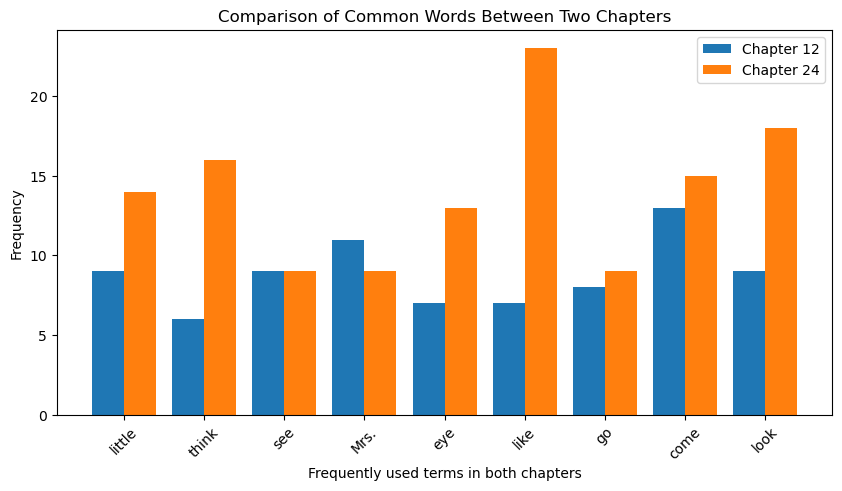

In [47]:
import matplotlib.pyplot as plt

# Plot the comparison
x = range(len(labels))

plt.figure(figsize=(10, 5))
plt.bar(x, freq_ch_12, width=0.4, label="Chapter 12", align="center")
plt.bar([i + 0.4 for i in x], freq_ch_24, width=0.4, label="Chapter 24", align="center")
plt.xticks([i + 0.2 for i in x], labels, rotation=45)
plt.xlabel("Frequently used terms in both chapters")
plt.ylabel("Frequency")
plt.legend()
plt.title("Comparison of Common Words Between Two Chapters")
plt.show()

## TF-IDF Measures as a tool for gauging word importance

TF-IDF is a measure commonly used in NLP and IR (information retrieval) to measure the importance of a term within a document relative to other documents in a collection. A collection of documents is often referred to as a **corpus**. 

First, we need to know the full set of words in the entire corpus. Let's continue to work with Jane Eyre as our sample text. Our corpus will be several chapters spread apart over the course of the novel. For convenience, we will assemble the chapters together in a dictionary. If we find the manual typing tedious, this is the sort of task we can assign to a gen AI LLM.

In [58]:
chapters = {
    "Chapter 6": extract_chapter(full_text, "VI"),
    "Chapter 12": extract_chapter(full_text, "XII"),
    "Chapter 18": extract_chapter(full_text, "XVIII"),
    "Chapter 24": extract_chapter(full_text, "XXIV"),
    "Chapter 30": extract_chapter(full_text, "XXX"),
    "Chapter 36": extract_chapter(full_text, "XXXVI"),
}

We're going to use regular expressions and spaCy to preprocess the texts, eliminating spaces, stop words, punctuation, and named entities. We could include named entities for a different analysis. 

In [59]:
def preprocess_text(text):
    text = re.sub(r'\s+', ' ', text.strip())
    doc = nlp(text)  # Process text with spaCy
    return " ".join(
        token.lemma_  # Use the lemma (base form)
        for token in doc
        if not token.is_stop  # Remove stop words
        and not token.is_punct  # Remove punctuation
        and not token.ent_type_  # Remove named entities
    )

# Process each chapter and store in a new dictionary
processed_chapters = {chapter: preprocess_text(text) for chapter, text in chapters.items()}

print(processed_chapters["Chapter 24"][:200])

rise dress think happen wonder dream certain reality till see Mr. hear renew word love promise arrange hair look face glass feel long plain hope aspect life colour eye behold fount fruition borrow bea


In [60]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

# Apply TF-IDF to all chapters as a corpus
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(processed_chapters.values())

# Convert to readable format
feature_names = vectorizer.get_feature_names_out()
tfidf_array = tfidf_matrix.toarray()

# Function to get top N words for a chapter
def top_tfidf_words(tfidf_scores, feature_names, top_n=10):
    sorted_indices = np.argsort(tfidf_scores)[::-1][:top_n]
    return [(feature_names[i], tfidf_scores[i]) for i in sorted_indices]

# Get the most important words for each chapter
chapter_names = list(processed_chapters.keys())

for i, chapter_name in enumerate(chapter_names):
    top_words = top_tfidf_words(tfidf_array[i], feature_names, top_n=10)

    # Print results
    print(f"\nTop 10 TF-IDF words in {chapter_name}:")
    for word, score in top_words:
        print(f"{word}: {score:.4f}")



Top 10 TF-IDF words in Chapter 6:
miss: 0.2837
lesson: 0.1475
dislike: 0.1248
class: 0.1248
temple: 0.1248
girl: 0.1248
cruel: 0.1218
come: 0.1216
feel: 0.1216
good: 0.1081

Top 10 TF-IDF words in Chapter 12:
horse: 0.2433
come: 0.1560
dog: 0.1441
mrs: 0.1350
hill: 0.1173
walk: 0.1125
causeway: 0.1098
traveller: 0.1081
go: 0.1072
look: 0.1072

Top 10 TF-IDF words in Chapter 18:
mr: 0.2291
party: 0.2164
say: 0.1848
miss: 0.1626
look: 0.1404
gentleman: 0.1383
room: 0.1256
think: 0.1182
eye: 0.1182
see: 0.1109

Top 10 TF-IDF words in Chapter 24:
sir: 0.3544
shall: 0.2013
say: 0.1753
love: 0.1723
like: 0.1688
mr: 0.1428
look: 0.1298
little: 0.1233
think: 0.1233
mademoiselle: 0.1170

Top 10 TF-IDF words in Chapter 30:
say: 0.1629
know: 0.1612
sister: 0.1290
father: 0.1270
read: 0.1074
st: 0.1049
ambitious: 0.1049
mr: 0.1047
like: 0.1047
poor: 0.0933

Top 10 TF-IDF words in Chapter 36:
am: 0.2581
ma: 0.2581
know: 0.1843
mr: 0.1697
hear: 0.1597
dead: 0.1475
stone: 0.1401
coach: 0.1124
like: 

We can see that, in light of our analytic interests, the results are quite interesting. "Look", "eye", and "see" are all distinctive terms in chapter 18, while "cruel" and "dislike" are characteristic of chapter 6. 

Here is one possible visualization for the data, using the Seaborn library to generate a heatmap. You may have to return to your Navigator menu, enter the environments tab, and add the Seaborn library for data visualization. I used ChatGPT to generate this visualization code.

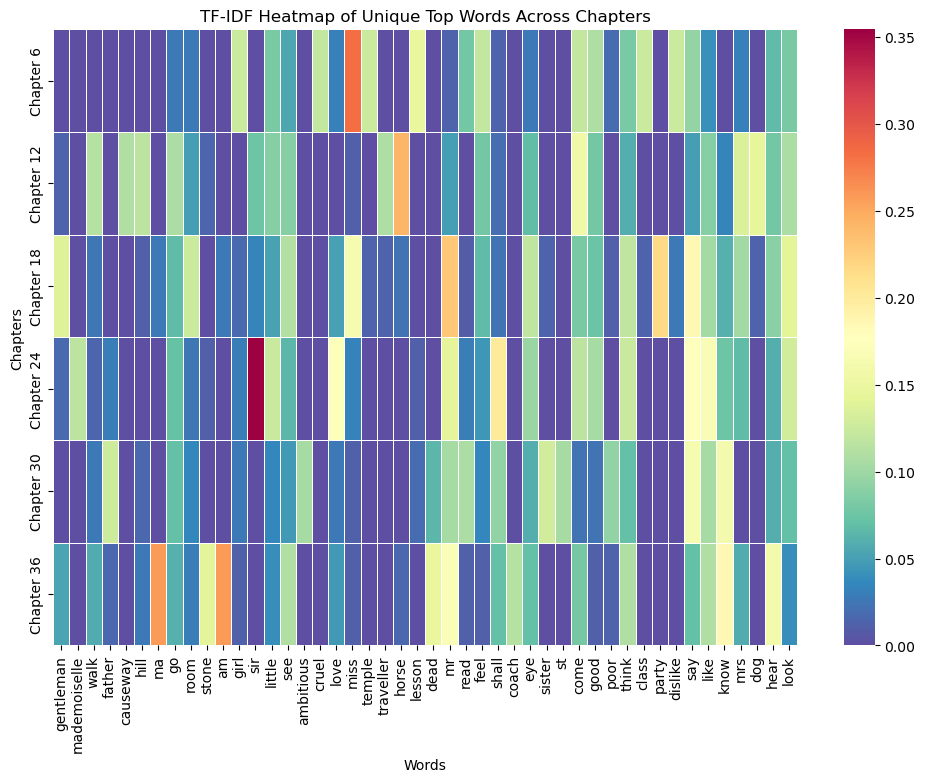

In [67]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Convert TF-IDF array to a DataFrame
df = pd.DataFrame(tfidf_array, index=processed_chapters.keys(), columns=feature_names)

# Step 1: Collect the top 10 words from each chapter
top_words_per_chapter = {}  # Store top words for each chapter
unique_top_words = set()  # Collect all unique words

for i, chapter in enumerate(processed_chapters.keys()):
    top_words = top_tfidf_words(tfidf_array[i], feature_names, top_n=10)
    top_words_per_chapter[chapter] = [word for word, _ in top_words]
    unique_top_words.update(top_words_per_chapter[chapter])  # Add to the unique set

# Step 2: Create a new DataFrame containing only those words
df_selected = df[list(unique_top_words)]  # Keep only relevant words

# Step 3: Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_selected, cmap="Spectral_r", linewidths=0.5, cbar=True, annot=False)

# Rotate words 90 degrees
plt.xticks(rotation=90)

# Labels and title
plt.xlabel("Words")
plt.ylabel("Chapters")
plt.title("TF-IDF Heatmap of Unique Top Words Across Chapters")
plt.show()

Let's break down what we just did and how TF-IDF works. To illustrate the process, we'll use a simplified corpus.

In [70]:
doc18 = nlp(chapter18)
corpus = [sent.text.replace('\n', " ").strip() for sent in list(doc.sents)[:3]]
corpus

['The promise of a smooth career, which my first calm introduction to Thornfield Hall seemed to pledge, was not belied on a longer acquaintance with the place and its inmates.',
 'Mrs. Fairfax turned out to be what she appeared, a placid-tempered, kind-natured woman, of competent education and average intelligence.',
 'My pupil was a lively child, who had been spoilt and indulged, and therefore was sometimes wayward; but as she was committed entirely to my care, and no injudicious interference from any quarter ever thwarted my plans for her improvement, she soon forgot her little freaks, and became obedient and teachable.']

Let's create a set of all the unique words in the corpus. In Python, the **set** data structure enforces value uniqueness. 

In [72]:
all_words = set()

for text in corpus:
    words = text.split(' ')
    all_words = all_words.union(set(words))


print(f'There are {len(all_words)} words: {all_words}')

There are 79 words: {'not', 'placid-tempered,', 'career,', 'of', 'pledge,', 'place', 'appeared,', 'little', 'acquaintance', 'woman,', 'but', 'freaks,', 'pupil', 'ever', 'smooth', 'with', 'education', 'from', 'spoilt', 'soon', 'introduction', 'turned', 'longer', 'intelligence.', 'care,', 'My', 'which', 'committed', 'Thornfield', 'competent', 'Fairfax', 'on', 'Mrs.', 'lively', 'improvement,', 'Hall', 'its', 'belied', 'sometimes', 'no', 'The', 'child,', 'was', 'interference', 'a', 'to', 'her', 'inmates.', 'average', 'for', 'as', 'any', 'thwarted', 'teachable.', 'she', 'forgot', 'the', 'entirely', 'kind-natured', 'indulged,', 'out', 'quarter', 'obedient', 'therefore', 'became', 'and', 'had', 'seemed', 'calm', 'promise', 'injudicious', 'been', 'plans', 'be', 'what', 'first', 'my', 'who', 'wayward;'}


Note that in this simple approach, we are not removing stop words.

The first step in calculating TF-IDF values is to calculate the term frequency. The term frequency is the number of times a term appears in a document divided by the total number of terms in the document.

In [73]:
num_docs = len(corpus)
num_terms = len(all_words)

tf_df = pd.DataFrame(np.zeros((num_docs, num_terms)), columns=list(all_words))

for i in range(num_docs):
    words = corpus[i].split(' ')
    for w in words:
        tf_df.loc[i, w] += 1 / len(words)

tf_df

,not,"placid-tempered,","career,",of,"pledge,",place,"appeared,",little,acquaintance,"woman,",...,promise,injudicious,been,plans,be,what,first,my,who,wayward;
0,0.033333,0.000000,0.033333,0.033333,0.033333,0.033333,0.000000,0.000000,0.033333,0.000000,...,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000
1,0.000000,0.052632,0.000000,0.052632,0.000000,0.000000,0.052632,0.000000,0.000000,0.052632,...,0.000000,0.000000,0.000000,0.000000,0.052632,0.052632,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019608,0.000000,0.000000,...,0.000000,0.019608,0.019608,0.019608,0.000000,0.000000,0.000000,0.039216,0.019608,0.019608


Here, we create a pandas data frame. We start it full of zeros (using `np.zeros`). We then go through the documents one at a time. For each document, we create a list of words. We then go through the list of words, calculate the term frequency, and insert the term frequency into the data frame at the appropriate cell. Each line, representing a document, contains an entry for every single word in the corpus. The result is a sparse vector, where a vector is sequence of numerical values arranged in a specific order, and sparsity means many values are zero or empty. 

Next, we need to compute inverse document frequency. Inverse document frequency represents the proportion of documents in a corpus that contain a certain term. Words that are unique to just a few documents in a corpus receive higher importance. This way, when term frequency is multiplied by inverse document frequency, words that are frequent in a document but are also frequent in many other documents have their importance reduced because they are just noise, common everywhere. Words that are more specific to just a few documents receive higher importance.

A simple way of calculating IDF is as log(number of documents / number of documents that contain the term). There are several more complex [formulas](https://en.wikipedia.org/wiki/Tf%E2%80%93idf#Inverse_document_frequency) that are used in making this calculation. The higher the proportion of documents to the number of documents that contain the term, the higher the IDF score. When we multiply IDF by TF, this will magnify the importance of term frequency, whereas if the term appears in many documents, the low IDF will minimize the importance of term frequency.

In [74]:
print("IDF of: ")

idf = {}

for w in all_words:
    k = 0 #num docs in corpus that contain word 
    for i in range(num_docs):
        if w in corpus[i].split():
            k+=1
    idf[w] = np.log10(num_docs/k)
    print(f'{w:.15}: {idf[w]:>10}')

IDF of: 
not: 0.47712125471966244
placid-tempered: 0.47712125471966244
career,: 0.47712125471966244
of: 0.17609125905568124
pledge,: 0.47712125471966244
place: 0.47712125471966244
appeared,: 0.47712125471966244
little: 0.47712125471966244
acquaintance: 0.47712125471966244
woman,: 0.47712125471966244
but: 0.47712125471966244
freaks,: 0.47712125471966244
pupil: 0.47712125471966244
ever: 0.47712125471966244
smooth: 0.47712125471966244
with: 0.47712125471966244
education: 0.47712125471966244
from: 0.47712125471966244
spoilt: 0.47712125471966244
soon: 0.47712125471966244
introduction: 0.47712125471966244
turned: 0.47712125471966244
longer: 0.47712125471966244
intelligence.: 0.47712125471966244
care,: 0.47712125471966244
My: 0.47712125471966244
which: 0.47712125471966244
committed: 0.47712125471966244
Thornfield: 0.47712125471966244
competent: 0.47712125471966244
Fairfax: 0.47712125471966244
on: 0.47712125471966244
Mrs.: 0.47712125471966244
lively: 0.47712125471966244
improvement,: 0.4771212

Now we can calculate the TF-IDF.

In [75]:
tf_idf_df = tf_df.copy()

for w in all_words:
    for i in range(num_docs):
        tf_idf_df.loc[i, w] = tf_df[w][i] * idf[w]

tf_idf_df

,not,"placid-tempered,","career,",of,"pledge,",place,"appeared,",little,acquaintance,"woman,",...,promise,injudicious,been,plans,be,what,first,my,who,wayward;
0,0.015904,0.000000,0.015904,0.005870,0.015904,0.015904,0.000000,0.000000,0.015904,0.000000,...,0.015904,0.000000,0.000000,0.000000,0.000000,0.000000,0.015904,0.005870,0.000000,0.000000
1,0.000000,0.025112,0.000000,0.009268,0.000000,0.000000,0.025112,0.000000,0.000000,0.025112,...,0.000000,0.000000,0.000000,0.000000,0.025112,0.025112,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009355,0.000000,0.000000,...,0.000000,0.009355,0.009355,0.009355,0.000000,0.000000,0.000000,0.006906,0.009355,0.009355


This is a very rough, manual way of approaching TF-IDF, in order to better understand it. The TF-IDF vectorizer that we imported from the scikit library performs these calculations automatically, generating a TF-IDF vector for us without our having to do the math ourselves. 

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tf_idf_vector = vectorizer.fit_transform(corpus)
tf_idf_array = tf_idf_vector.toarray()

words_set = vectorizer.get_feature_names_out()

sk_tf_idf_df = pd.DataFrame(tf_idf_array, columns=words_set)

sk_tf_idf_df

,acquaintance,and,any,appeared,as,average,be,became,been,belied,...,thwarted,to,turned,was,wayward,what,which,who,with,woman
0,0.190764,0.112668,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.190764,...,0.000000,0.225337,0.000000,0.145081,0.000000,0.000000,0.190764,0.000000,0.190764,0.000000
1,0.000000,0.139776,0.000000,0.236661,0.000000,0.236661,0.236661,0.000000,0.000000,0.000000,...,0.000000,0.139776,0.236661,0.000000,0.000000,0.236661,0.000000,0.000000,0.000000,0.236661
2,0.000000,0.381896,0.129321,0.000000,0.129321,0.000000,0.000000,0.129321,0.129321,0.000000,...,0.129321,0.076379,0.000000,0.295057,0.129321,0.000000,0.000000,0.129321,0.000000,0.000000


In [78]:
def top_tfidf_terms(df, top_n=10):
    for i, row in df.iterrows():  # Iterate over each document
        sorted_indices = row.argsort()[::-1][:top_n]  # Get indices of top 10 words
        top_words = [(df.columns[idx], row.iloc[idx]) for idx in sorted_indices]  # Extract word-score pairs
        
        # Print results
        print(f"\nTop {top_n} TF-IDF words for Document {i+1}:")
        for word, score in top_words:
            print(f"{word}: {score:.4f}")

# Display top 10 words for each document
top_tfidf_terms(sk_tf_idf_df)




Top 10 TF-IDF words for Document 1:
the: 0.3815
to: 0.2253
not: 0.1908
seemed: 0.1908
career: 0.1908
promise: 0.1908
place: 0.1908
on: 0.1908
acquaintance: 0.1908
calm: 0.1908

Top 10 TF-IDF words for Document 2:
woman: 0.2367
be: 0.2367
kind: 0.2367
mrs: 0.2367
natured: 0.2367
out: 0.2367
fairfax: 0.2367
placid: 0.2367
education: 0.2367
tempered: 0.2367

Top 10 TF-IDF words for Document 3:
and: 0.3819
was: 0.2951
my: 0.2951
her: 0.2586
she: 0.1967
ever: 0.1293
care: 0.1293
child: 0.1293
committed: 0.1293
obedient: 0.1293


This is a very rough approximation of the TF-IDF analysis we carried out on full chapters of the novel.